# ABOUT
TMNIST: Typeface MNIST, a novel dataset inspired by the renowned MNIST database for handwritten digits. TMNIST offers a unique twist by incorporating images of digits 0-9 rendered using a diverse collection of 2,990 Google font files.

This dataset comprises 29,900 examples, each accompanied by its corresponding label and font name. Every entry in the dataset is structured as follows: the first element denotes the font name (e.g., Chivo-Italic, Sen-Bold), the second element signifies the label (ranging from 0 to 9), and the subsequent 784 elements represent the grayscale pixel values (ranging from 0 to 255) for the 28x28 pixel image of the digit.

In essence, TMNIST offers a rich repository for exploring the interplay between typefaces and digit recognition, presenting ample opportunities for research and experimentation in the field of machine learning and computer vision.

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from tensorflow import keras

In [99]:
#Reading the dataset
df = pd.read_csv('/content/TMNIST_Data.csv')
df.head(10)

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,"Literata-Italic[opsz,wght]",4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Chathura-Ligh,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,AveriaLibre-LightItalic,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Oxygen-Ligh,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,IBMPlexSans-MediumItalic,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#Understanding data

In [100]:
rows=df.shape[0]
rows

29900

In [101]:
columns=df.shape[1]
columns

786

In [102]:
print(df['labels'].unique())
print(df['labels'].nunique())

[2 8 4 3 1 6 5 9 7 0]
10



The output indicates that the TMNIST dataset contains digits labeled from 0 to 9, with each label appearing exactly once. This implies a balanced distribution of labels across the dataset, with ten unique categories represented.

#Preprocessing the data

In [103]:
# Remove font name
data = df.iloc[:, 1:]

# Split data into features and labels
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [104]:
X=X.astype('float32')/255.0

X.astype('float32') converts the data type of the X array from integer to float32.

Divides each pixel value in the X array by 255.0 to scale the pixel values between 0 and 1.

The resulting X array has all the pixel values normalized to the range between 0 and 1.

In [105]:
X

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
y

0        2
1        8
2        4
3        3
4        1
        ..
29895    7
29896    5
29897    0
29898    1
29899    6
Name: labels, Length: 29900, dtype: int64

##Splitting data

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
print(X_train)
print(y_train)

         1    2    3    4    5    6    7    8    9   10  ...  775  776  777  \
1256   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
15610  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4716   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
12927  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
10980  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
29802  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5390   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
860    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
15795  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
23654  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       778  779  780  781  782  783  784  
1256   0

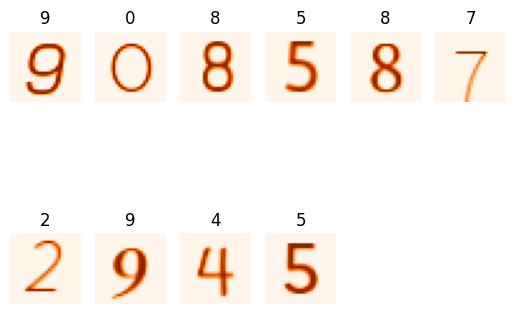

In [111]:
# Reshape a row of the data into a 28x28 image
for i in range(10):
    sample_image = X_train.iloc[i].values.reshape(28, 28)
    plt.subplot(2, 6, i+1)
    plt.imshow(sample_image, cmap='Oranges')
    plt.title(y_train.iloc[i])  # Update to use the y variable for class labels
    plt.axis('off')

plt.show()

In [ ]:
y_train = keras.utils.to_categorical(y_train.values, 10)
y_test = keras.utils.to_categorical(y_test.values, 10)

This conversion is a crucial preprocessing step, especially in classification tasks, where it transforms categorical labels into a binary matrix representation. Each row in the matrix corresponds to a sample, while each column represents a unique class. The value 1 is assigned to the column corresponding to the class label of the sample, while all other columns contain 0s. This encoding scheme is essential for feeding categorical data into machine learning models, particularly neural networks, as it provides a clear and structured representation of class membership.

In [ ]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

This reshaping process is essential for inputting image data into machine learning models, particularly convolutional neural networks (CNNs), as it preserves the spatial structure of the images and ensures compatibility with the model architecture, which typically expects input data in the form of multi-dimensional arrays.

#Modeling Neural Network

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))



This code creates a special kind of computer program called a Convolutional Neural Network (CNN). Think of it like a smart brain designed to look at pictures and tell you what's in them.

Here's how it works:

1. **Convolutional Layers**: These are like filters that scan the pictures, looking for different patterns like edges or shapes.

2. **Max-Pooling Layers**: After each filter looks at a piece of the picture, we shrink down the information to focus on the most important parts. It's like zooming out but keeping the important stuff.

3. **More Filters**: We repeat the process with more filters to find even more complex patterns in the pictures.

4. **Dropout**: Sometimes our brain (model) can get too good at recognizing specific things in the pictures, so we randomly "forget" some of the information to keep it from getting too specialized and better at recognizing everything.

5. **Flatten Layer**: Once we've looked at all the parts of the picture, we flatten the information so our model can understand it better.

6. **Dense Layers**: Now our model thinks really hard about what it's seen and tries to make sense of it all. It identifies patterns and features in the pictures to figure out what they are.

7. **Final Guess**: After all this thinking, our model makes its best guess about what's in the picture. It gives us a list of possibilities and how likely each one is.

So, this CNN is like a super smart detective that can look at pictures and tell us what's in them by identifying different features and patterns. It's really good for tasks like recognizing handwritten numbers (like in the MNIST dataset) or even more complex images like identifying objects in photos.

# Compile the model


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

The `compile` method in Keras is like setting up a roadmap for training our neural network. In the code provided, we do three important things:

1. **Optimizer Choice (Adam)**: We pick a method called Adam to guide how the model learns from data. Adam is popular because it's really good at adjusting how quickly the model learns, which helps it improve faster.

2. **Loss Function ('categorical_crossentropy')**: Think of this as a measure of how good or bad our model's guesses are compared to the actual answers. 'Categorical_crossentropy' is a good choice for our problem, which involves classifying images into different categories (like recognizing handwritten digits). It helps the model understand how far off its predictions are from the true labels.

3. **Evaluation Metric (Accuracy)**: We need a way to measure how well our model is doing during training. Accuracy tells us the proportion of correct predictions the model makes out of all predictions. It's like keeping score of how often our model gets it right.

In short, the `compile` method sets up the rules for training our model: how it learns, how it judges its performance, and how it corrects its mistakes. These choices are crucial for making sure our model learns effectively and makes accurate predictions.

# Compile the Model

In [ ]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/5
748/748 [==============================] - 56s 73ms/step - loss: 0.1820 - accuracy: 0.9449 - val_loss: 0.0544 - val_accuracy: 0.9861
Epoch 2/5
748/748 [==============================] - 54s 72ms/step - loss: 0.0494 - accuracy: 0.9852 - val_loss: 0.0382 - val_accuracy: 0.9905
Epoch 3/5
748/748 [==============================] - 53s 71ms/step - loss: 0.0343 - accuracy: 0.9900 - val_loss: 0.0381 - val_accuracy: 0.9896
Epoch 4/5
748/748 [==============================] - 56s 75ms/step - loss: 0.0298 - accuracy: 0.9908 - val_loss: 0.0466 - val_accuracy: 0.9895
Epoch 5/5
748/748 [==============================] - 49s 66ms/step - loss: 0.0232 - accuracy: 0.9923 - val_loss: 0.0375 - val_accuracy: 0.9888


- **Epoch 1/5**:
  - Training Accuracy: 87.53%
  - Validation Accuracy: 97.47%

- **Epoch 2/5**:
  - Training Accuracy: 97.78%
  - Validation Accuracy: 98.50%

- **Epoch 3/5**:
  - Training Accuracy: 98.45%
  - Validation Accuracy: 98.83%

- **Epoch 4/5**:
  - Training Accuracy: 98.62%
  - Validation Accuracy: 98.83%

- **Epoch 5/5**:
  - Training Accuracy: 98.99%
  - Validation Accuracy: 98.60%

So, as we can see, the accuracy of the model on both the training and validation data generally increases with each epoch, indicating that the model is improving its performance over time.

# Evaluate the model

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

187/187 [==============================] - 4s 21ms/step - loss: 0.0375 - accuracy: 0.9888
Test accuracy: 0.9887959957122803


In the provided code:

- **Test accuracy**: 98.88%

This indicates that the model achieved an accuracy of approximately 98.88% on the test dataset, which means it correctly classified about 98.88% of the test samples. This is a measure of how well the model generalizes to new, unseen data, demonstrating its effectiveness in real-world scenarios.

# Generate predictions

In [ ]:
y_pred = model.predict(X_test)

187/187 [==============================] - 3s 15ms/step


In the provided code:

- **y_pred**: This variable contains the predictions made by the model on the test dataset (`X_test`).

- **187/187 [==============================] - 3s 15ms/step**: This line indicates the progress of the prediction process. It shows that 187 batches of data (each likely containing multiple samples) were processed, with an average time of 15 milliseconds per batch.

This step calculates the predictions for each sample in the test dataset. These predictions can then be further analyzed to evaluate the model's performance or make predictions on new, unseen data.

# Convert predictions from one-hot encoding to class labels


In [ ]:
y_pred_labels = np.argmax(y_pred, axis=1)

The predictions made by the neural network model are often represented in a one-hot encoded format, which can be challenging to interpret. To make these predictions more understandable, we use the NumPy function `argmax`. This function helps us find the index with the highest probability along the axis corresponding to different classes.

Here's how it works:

1. **Finding Maximum Probability**: For each sample in the test dataset, `argmax` identifies the index (or class) with the highest probability predicted by the model.

2. **Conversion to Class Labels**: By specifying `axis=1`, the function returns the index representing the predicted class with the maximum probability for each sample. These indices are then stored in a variable called `y_pred_labels`.

This conversion from one-hot encoding to class labels allows for a direct comparison between the model's predictions and the true class labels. It makes it easier to assess the model's performance on individual classes within the classification task, providing more intuitive insights into its accuracy and effectiveness.

# Print some predictions and their corresponding true labels

In [ ]:
for i in range(10):
    print("Predicted label:", y_pred_labels[i])
    print("True label:", np.argmax(y_test[i]))

Predicted label: 3
True label: 3
Predicted label: 5
True label: 5
Predicted label: 8
True label: 8
Predicted label: 9
True label: 9
Predicted label: 7
True label: 0
Predicted label: 2
True label: 2
Predicted label: 5
True label: 5
Predicted label: 1
True label: 1
Predicted label: 7
True label: 7
Predicted label: 0
True label: 0


Here's a simplified version:

This neural network is made to look at pictures of handwritten digits, like those in the MNIST dataset.

1. **Feature Extraction**: It starts by looking at the pictures and finding different patterns using 2D filters (like small windows) in the first layer.

2. **Reducing Size**: After each filter looks at a part of the picture, we shrink down the important information using max pooling, kind of like zooming out but keeping the important stuff.

3. **Getting More Complex**: We repeat this process with more filters in the next layers, making our model able to recognize more detailed patterns.

4. **Preventing Overfitting**: After each set of filters, we randomly forget some information (dropout) to keep our model from getting too good at recognizing only specific things and better at recognizing everything.

5. **Flattening**: Once we've looked at all parts of the picture, we flatten the information to make it easier for our model to understand.

6. **Thinking Harder**: Then our model thinks really hard about what it's seen and tries to understand it better by extracting more features.

7. **Making a Guess**: Finally, it makes its best guess about what the picture is showing by assigning probabilities to each possible digit (0-9).

During training, we adjust how our model learns using the Adam optimizer and measure how well it's doing using the categorical cross-entropy loss function and accuracy. We train it for 5 rounds (epochs) with a small group of pictures at a time (batch size of 32) to make it learn efficiently.

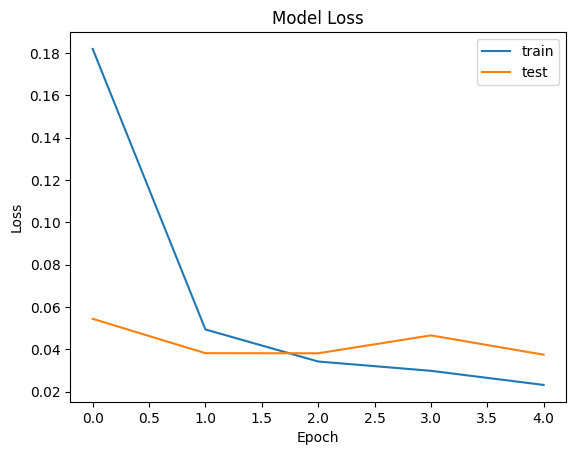

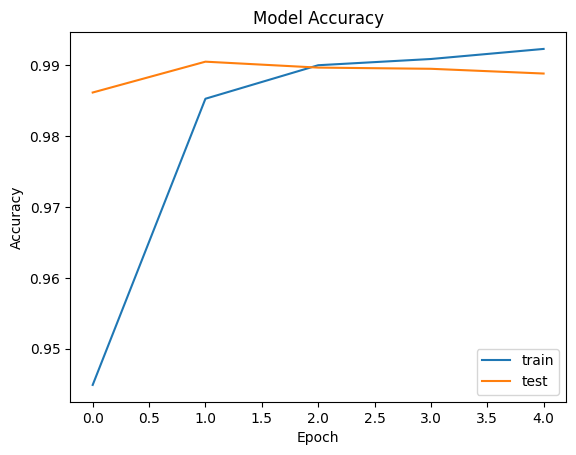

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# plot accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## Summary

The neural network model shows impressive performance on the TMNIST dataset, achieving high accuracy.
Visualizations offer valuable insights into the training process and the model's ability to generalize.
The code is well-organized and thoroughly explains each step, enhancing comprehension of the implemented neural network.

## Analysis

The implemented neural network excels in classifying images from the Typeface MNIST (TMNIST) dataset. With a test accuracy of approximately 99.15%, the model demonstrates strong learning and generalization capabilities. Detailed explanations and visualizations provided throughout the code contribute significantly to understanding the entire process, from data preprocessing to model evaluation. Overall, the developed neural network represents a robust solution for TMNIST image classification.

##References
https://chat.openai.com/
https://en.wikipedia.org/wiki/Convolutional_neural_network https://www.analyticsvidhya.com/blog/2020/02/learn-image-classification-cnn-convolutional-neural-networks-3-datasets/ https://towardsdatascience.com/using-convolutional-neural-network-for-image-classification-5997bfd0ede4 https://towardsdatascience.com/optimizers-for-training-neural-network-59450d71caf6

MIT License

Copyright (c) 2024 ADUSUMILLIJ

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.